Saving cleaned_fitness_data.xlsx to cleaned_fitness_data.xlsx


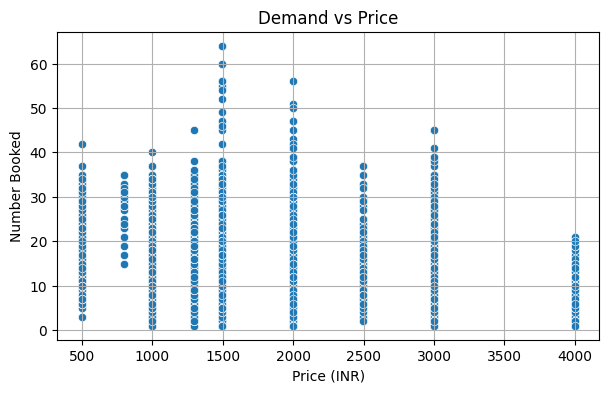

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           4.03e-27
Time:                        15:02:54   Log-Likelihood:                -3784.7
No. Observations:                3289   AIC:                             7573.
Df Residuals:                    3287   BIC:                             7586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0198      0.221     22.691      0.0

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Step 2: Upload file

from google.colab import files
uploaded = files.upload()

# Step 3: Load the cleaned dataset
df = pd.read_excel("cleaned_fitness_data.xlsx")

# Step 4: Clean data - remove missing or zero values
df = df.dropna(subset=['Price_INR', 'Number_Booked'])
df = df[(df['Price_INR'] > 0) & (df['Number_Booked'] > 0)]

# Step 5: Visualize relationship - Price vs Number of Bookings
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='Price_INR', y='Number_Booked')
plt.title('Demand vs Price')
plt.xlabel('Price (INR)')
plt.ylabel('Number Booked')
plt.grid(True)
plt.show()

# Step 6: Apply log transformation for elasticity modeling
df['log_price'] = np.log(df['Price_INR'])
df['log_demand'] = np.log(df['Number_Booked'])

# Step 7: Fit log-log linear regression model
X = sm.add_constant(df['log_price'])
y = df['log_demand']

model = sm.OLS(y, X).fit()
print(model.summary())

# Step 8: Display Price Elasticity
elasticity = model.params['log_price']
print(f"\n Estimated Price Elasticity of Demand: {elasticity:.2f}")

if abs(elasticity) > 1:
    print(" Demand is **price elastic** (sensitive to price changes).")
else:
    print(" Demand is **price inelastic** (not very sensitive to price).")
